In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [47]:
## read data
data = pd.read_csv("data/Social_Network_Ads.csv")

In [48]:
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
328,15796351,Male,36,118000,1
219,15732987,Male,59,143000,1
171,15570932,Male,34,115000,0
35,15713144,Male,35,27000,0
378,15577806,Male,41,87000,1


In [49]:
data.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

# 1. Reformat data

In [50]:
data = data.drop("User ID", axis='columns')
# Vì sao phải bỏ UserID?

In [51]:
np.reshape(data['Age'].values,(1,-1))

array([[19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32, 18, 29,
        47, 45, 46, 48, 45, 47, 48, 45, 46, 47, 49, 47, 29, 31, 31, 27,
        21, 28, 27, 35, 33, 30, 26, 27, 27, 33, 35, 30, 28, 23, 25, 27,
        30, 31, 24, 18, 29, 35, 27, 24, 23, 28, 22, 32, 27, 25, 23, 32,
        59, 24, 24, 23, 22, 31, 25, 24, 20, 33, 32, 34, 18, 22, 28, 26,
        30, 39, 20, 35, 30, 31, 24, 28, 26, 35, 22, 30, 26, 29, 29, 35,
        35, 28, 35, 28, 27, 28, 32, 33, 19, 21, 26, 27, 26, 38, 39, 37,
        38, 37, 42, 40, 35, 36, 40, 41, 36, 37, 40, 35, 41, 39, 42, 26,
        30, 26, 31, 33, 30, 21, 28, 23, 20, 30, 28, 19, 19, 18, 35, 30,
        34, 24, 27, 41, 29, 20, 26, 41, 31, 36, 40, 31, 46, 29, 26, 32,
        32, 25, 37, 35, 33, 18, 22, 35, 29, 29, 21, 34, 26, 34, 34, 23,
        35, 25, 24, 31, 26, 31, 32, 33, 33, 31, 20, 33, 35, 28, 24, 19,
        29, 19, 28, 34, 30, 20, 26, 35, 35, 49, 39, 41, 58, 47, 55, 52,
        40, 46, 48, 52, 59, 35, 47, 60, 49, 40, 46, 59, 41, 35, 

In [52]:
lbl = LabelEncoder()

data["Gender"] = lbl.fit_transform(data['Gender']) # 2 steps: fit => transform

scaler = MinMaxScaler()
data["Age"] = scaler.fit_transform(np.reshape(data['Age'].values,(-1,1)))
data["EstimatedSalary"] = scaler.fit_transform(np.reshape(data['EstimatedSalary'].values,(-1,1)))

In [53]:
data.sample(5)

,Gender,Age,EstimatedSalary,Purchased
133,0,0.071429,0.392593,0
5,1,0.214286,0.318519,0
168,1,0.261905,0.985185,1
11,0,0.190476,0.274074,0
262,0,0.880952,0.814815,1


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    int32  
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 11.1 KB


# 2. Train test split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3,random_state=422)

In [56]:
X_test.sample(5)

,Gender,Age,EstimatedSalary
304,0,0.523810,0.333333
235,1,0.666667,0.474074
281,1,0.404762,0.340741
119,1,0.547619,0.325926
330,1,0.476190,0.266667


# 3. Modeling

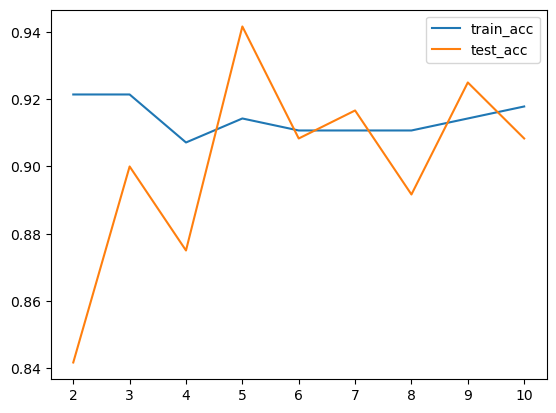

In [58]:
train_acc = []
test_acc = []
### k nen la so le, k should > 1, k!= N
for k in range(2, 11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    tr_ac = neigh.score(X_train,y_train)
    te_ac = neigh.score(X_test,y_test)
    train_acc.append(tr_ac)
    test_acc.append(te_ac)

# plot accuracy to select k
X_label = list(range(2,11))
plt.plot(X_label,train_acc,label='train_acc')
plt.plot(X_label,test_acc,label='test_acc')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import classification_report

In [60]:
fk=7
neigh = KNeighborsClassifier(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(classification_report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.9189    0.9444    0.9315        72
           1     0.9130    0.8750    0.8936        48

    accuracy                         0.9167       120
   macro avg     0.9160    0.9097    0.9126       120
weighted avg     0.9166    0.9167    0.9164       120



In [61]:
fk=10
neigh = KNeighborsClassifier(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(classification_report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.8961    0.9583    0.9262        72
           1     0.9302    0.8333    0.8791        48

    accuracy                         0.9083       120
   macro avg     0.9132    0.8958    0.9026       120
weighted avg     0.9098    0.9083    0.9074       120



In [62]:
fk=1
neigh = KNeighborsClassifier(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(classification_report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.8784    0.9028    0.8904        72
           1     0.8478    0.8125    0.8298        48

    accuracy                         0.8667       120
   macro avg     0.8631    0.8576    0.8601       120
weighted avg     0.8662    0.8667    0.8662       120

